<a href="https://colab.research.google.com/github/ricardoricrob76/gerdau/blob/main/GERDAU_Aula_15_Identificando_Tipos_de_Flores_Iris_csv_Implementa%C3%A7%C3%A3o_Modelo_de_ML_com_Nayve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GERDAU - Treinamento InCompany
# Autor:  Profº - Ricardo Roberto de Lima - FABWORK
# Ciência de Dados com Python + Pandas, Numpy, SkLearning. Diabetes
# Machine Learning - Aula 15 - Modelos Supervisionados - Algoritmo Naive Bayes
# Gerando Modelo de Machine Learning (classificação)
# Domínio: Pessoas com Identificando os Tipos de Flores - Virginica, Versicolor, outra.

In [1]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Estrutura Inicial para um Projeto de Machine Learning.
from IPython.display import Image
Image('Workflow.png')

In [3]:
# Adaptar para o Ambiente da GERDAU.
# import awswrangler as wr

# import boto3
# boto3.setup_default_session(region_name="us-east-2")

df_iris = pd.read_csv("iris.csv")

# Criar um Objeto do tipo DataFrame no Ambiente Big Data - Gerdau
# df_iris=wr.s3.read_csv('s3://gerdau-analytics/gdata/datascience/iris.csv')


#Carrega o dataset com os dados para o treinamento e validacao
# df_crioterapia_treino = pd.read_csv("dados_cryotherapy.csv", encoding="utf-8")

In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Verificando o formato dos dados
df_iris.shape

(150, 5)

In [7]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
#Definição do atributo de classificacao
data_classif = np.array(df_iris['species'])

In [8]:
# Verificando as primeiras linhas do dataset
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Verificando as ultimas linhas do dataset
df_iris.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_iris, size=35):
    corr = df_iris.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

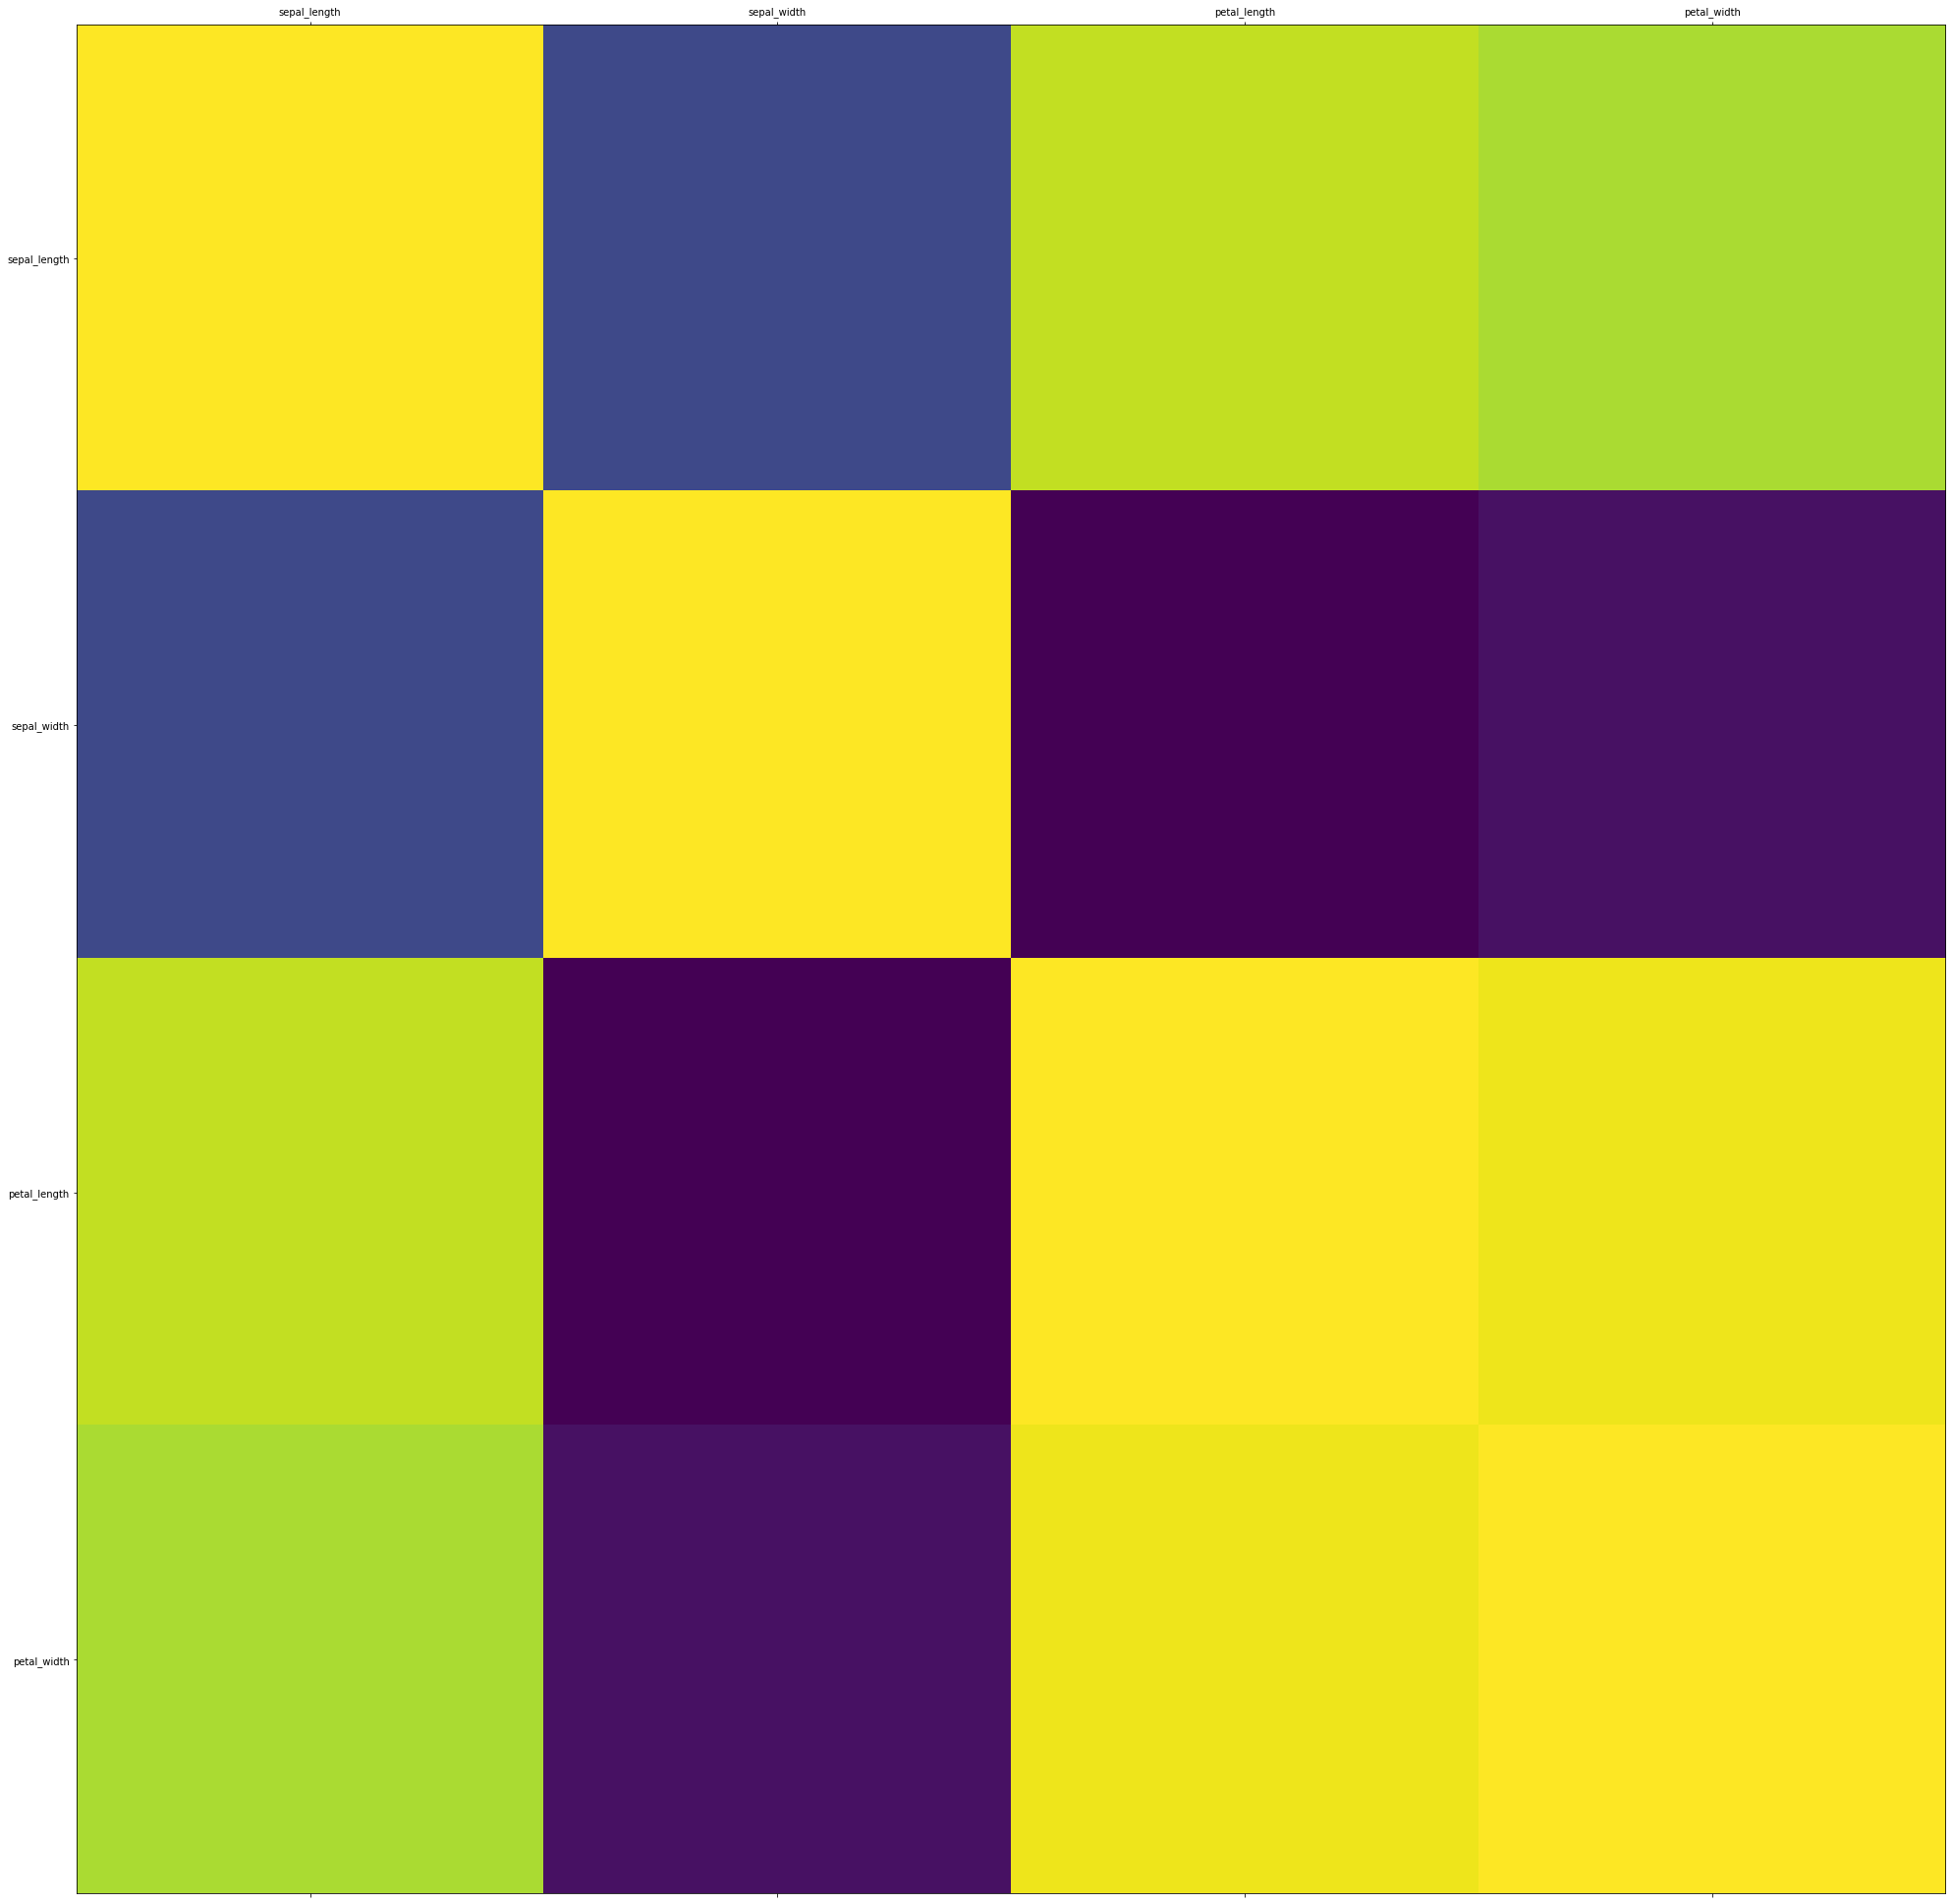

In [11]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df_iris)

In [ ]:
# Spliting = 70% para dados de treino e 30% para dados de teste

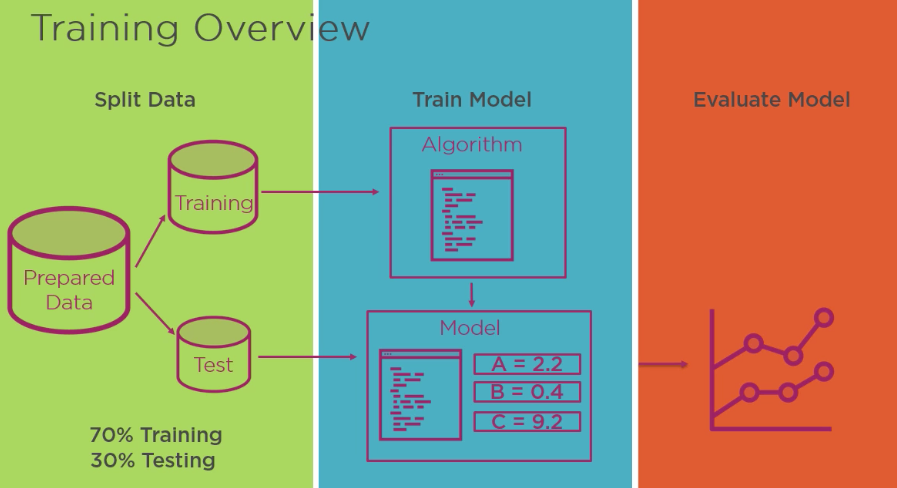

In [ ]:
from IPython.display import Image
Image('Treinamento.png')

In [12]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [13]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[4.8 3.  1.4 0.1]
 [6.9 3.2 5.7 2.3]
 [5.1 3.5 1.4 0.3]
 [5.5 4.2 1.4 0.2]
 [5.6 2.5 3.9 1.1]
 [7.  3.2 4.7 1.4]
 [5.  3.5 1.6 0.6]
 [7.2 3.  5.8 1.6]
 [5.1 3.8 1.9 0.4]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [4.9 3.1 1.5 0.1]
 [5.  3.  1.6 0.2]
 [5.8 2.7 4.1 1. ]
 [5.4 3.7 1.5 0.2]
 [5.6 2.7 4.2 1.3]
 [6.3 2.7 4.9 1.8]
 [6.4 3.2 4.5 1.5]
 [5.1 3.7 1.5 0.4]
 [7.7 2.8 6.7 2. ]
 [5.4 3.9 1.7 0.4]
 [7.7 3.  6.1 2.3]
 [5.4 3.9 1.3 0.4]
 [7.2 3.2 6.  1.8]
 [4.9 2.4 3.3 1. ]
 [5.4 3.4 1.7 0.2]
 [7.6 3.  6.6 2.1]
 [5.6 2.9 3.6 1.3]
 [6.7 3.  5.  1.7]
 [6.2 3.4 5.4 2.3]
 [5.  3.3 1.4 0.2]
 [5.8 2.8 5.1 2.4]
 [4.4 3.2 1.3 0.2]
 [5.7 2.5 5.  2. ]
 [6.5 2.8 4.6 1.5]
 [4.9 3.1 1.5 0.1]
 [5.8 2.6 4.  1.2]
 [4.4 2.9 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.5 3.5 1.3 0.2]
 [5.1 2.5 3.  1.1]
 [6.4 3.1 5.5 1.8]
 [5.  3.4 1.6 0.4]
 [5.5 2.4 3.8 1.1]
 [4.6 3.1 1.5 0.2]
 [5.7 2.8 4.5 1.3]
 [6.5 3.  5.8 2.2]
 [6.7 2.5 5.8 1.8]
 [6.1 2.6 5.6 1.4]
 [4.4 3.  1.3 0.2]
 [

In [14]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_iris.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_iris.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [15]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [16]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [17]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.9809523809523809
Na Base de Treinamento


In [18]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.9111111111111111
na Base de Teste


In [21]:
from sklearn import metrics

In [ ]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [23]:
#Importação do pacote joblib
import joblib

In [24]:
#Persistência do modelo no arquivo modelo_iris_MNB.pkl
joblib.dump(modelo_NB, 'modelo_iris_MNB.pkl')

['modelo_iris_MNB.pkl']

In [26]:
#Persistência do modelo no arquivo modelo_iris_MNB.joblib
joblib.dump(modelo_NB, 'modelo_iris_MNB.joblib')

['modelo_iris_MNB.joblib']